In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sachin099","key":"f6bd9b7688a5358dcddbe233aa83f959"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d ananthr1/weather-prediction

Dataset URL: https://www.kaggle.com/datasets/ananthr1/weather-prediction
License(s): CC-BY-NC-SA-4.0
  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 16.8MB/s]


In [ ]:
!unzip /content/weather-prediction.zip

Archive:  /content/weather-prediction.zip
  inflating: seattle-weather.csv     


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data=pd.read_csv('/content/seattle-weather.csv')

In [ ]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.drop(columns=['date'], inplace=True)

In [ ]:
data.isnull().sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
data[data.duplicated()]

,precipitation,temp_max,temp_min,wind,weather
188,0.0,26.7,12.8,3.8,sun
629,0.0,21.1,13.3,2.5,sun
748,0.0,9.4,0.6,2.2,sun
751,0.0,10.0,1.7,1.5,sun
863,0.0,26.7,12.8,3.8,sun
959,0.0,27.8,15.0,2.8,sun
1019,0.0,20.6,11.1,3.3,sun
1346,0.0,22.8,13.3,2.4,sun


In [ ]:
mapping = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}

# Apply the mapping to the 'Category' column
data['weather'] = data['weather'].map(mapping)
print(data)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


In [ ]:
column = ['precipitation','temp_max','temp_min', 'wind']
data[column].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


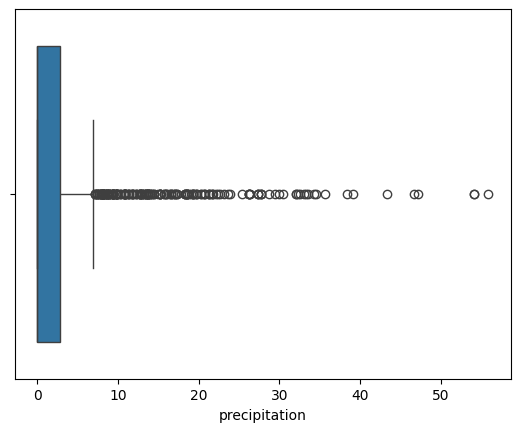

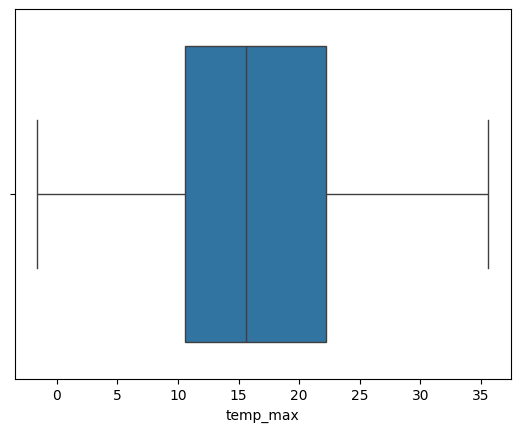

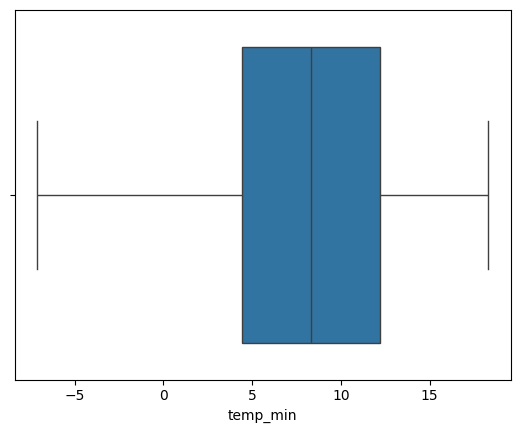

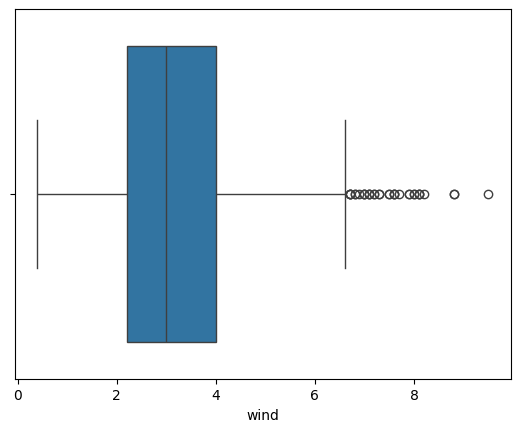

In [ ]:
for cols in column:
  sns.boxplot(x=data[cols])
  plt.show()

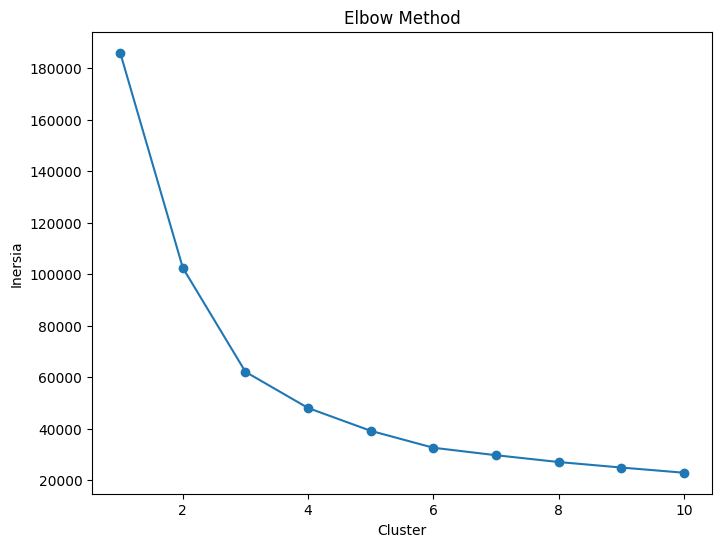

In [ ]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,  n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42,  n_init=10)
data['cluster'] = kmeans.fit_predict(scaled_features)

data.to_csv('data_baru.csv', index=False)

In [ ]:
df_clean = pd.read_csv("data_baru.csv")
df_clean.head(100)

,precipitation,temp_max,temp_min,wind,weather,cluster
0,0.0,12.8,5.0,4.7,0,3
1,10.9,10.6,2.8,4.5,2,3
2,0.8,11.7,7.2,2.3,2,2
3,20.3,12.2,5.6,4.7,2,1
4,1.3,8.9,2.8,6.1,2,3
...,...,...,...,...,...,...
95,4.6,9.4,2.8,1.8,3,2
96,0.3,11.1,3.3,2.6,2,2
97,0.0,16.1,1.7,4.3,4,3
98,0.0,21.1,7.2,4.1,4,4


In [ ]:
X = data.drop(['cluster'], axis=1)
y = data['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
start_time = time.time()

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=4)
grid_search.fit(X_train, y_train)

print("Best Parameter", grid_search.best_params_)

best_knn = grid_search.best_estimator_

best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

Best Parameter {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precicion:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9339407744874715
Precicion: 0.9331127241292003
Recall: 0.9339407744874715
F1 Score: 0.9320817123768751


In [ ]:
end_time = time.time()

process_time = end_time - start_time

print(f"Time run: {process_time} second")

Time run: 47.74916052818298 second


In [ ]:
X_test["Weather Prediction"] = y_pred
X_test

,precipitation,temp_max,temp_min,wind,weather,Weather Prediction
892,0.0,23.9,11.1,2.7,4,4
1105,5.8,7.8,6.1,0.5,2,2
413,0.0,9.4,4.4,3.4,2,2
522,0.0,26.7,12.2,2.5,4,4
1036,1.8,13.3,7.2,2.9,2,3
...,...,...,...,...,...,...
323,54.1,13.3,8.3,6.0,2,1
650,1.0,14.4,8.9,2.2,2,0
439,0.0,14.4,8.9,4.3,2,3
798,4.3,15.0,9.4,4.3,2,0
